# Interactive Testing - Clothing Classifier

## Objective:
Test the trained MobileNetV2 model with new images:
- Upload any clothing image
- Get instant predictions
- See confidence scores for all categories
- Visualize results

---

## Model Info:
**Architecture:** MobileNetV2  
**Test Accuracy:** 83.57%  
**Categories:** dress, outer, pants, rompers, skirt, top

## Step 1: Import Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

print(" Libraries imported!")
print(f"TensorFlow version: {tf.__version__}")

 Libraries imported!
TensorFlow version: 2.19.0


## Step 2: Set Paths and Load Model

In [4]:
# Project paths
PROJECT_ROOT = r"C:\Users\My PC\Documents\clothing_classifier"
MODELS_PATH = os.path.join(PROJECT_ROOT, "models")
TEST_IMAGES_PATH = os.path.join(PROJECT_ROOT, "test_images")  # Create this folder for test images

# Create test images folder if it doesn't exist
os.makedirs(TEST_IMAGES_PATH, exist_ok=True)

# Category mappings (must match training)
CATEGORIES = ['dress', 'outer', 'pants', 'rompers', 'skirt', 'top']
INDEX_TO_CATEGORY = {idx: cat for idx, cat in enumerate(CATEGORIES)}

print(" Paths configured!")
print(f"Test images folder: {TEST_IMAGES_PATH}")
print(f"\nCategories: {', '.join(CATEGORIES)}")

 Paths configured!
Test images folder: C:\Users\My PC\Documents\clothing_classifier\test_images

Categories: dress, outer, pants, rompers, skirt, top


In [6]:
# Load the trained model
model_files = [f for f in os.listdir(MODELS_PATH) if f.endswith('.keras')]

if not model_files:
    print(" No model file found!")
else:
    model_file = model_files[0]
    model_path = os.path.join(MODELS_PATH, model_file)
    
    print(f" Loading model: {model_file}")
    model = keras.models.load_model(model_path)
    
    print("\n Model loaded successfully!")
    print(f"Ready to classify images into: {', '.join(CATEGORIES)}")

 Loading model: mobilenetv2_6categories_20251228_221657_best.keras

 Model loaded successfully!
Ready to classify images into: dress, outer, pants, rompers, skirt, top


## Step 3: Define Prediction Function

In [8]:
def preprocess_image(img_path, target_size=(224, 224)):
    """
    Load and preprocess an image for prediction.
    """
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert to array
    img_array = image.img_to_array(img)
    
    # Normalize (same as training: rescale=1./255)
    img_array = img_array / 255.0
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array, img


def predict_clothing(img_path, model, categories):
    """
    Predict clothing category for an image.
    
    Returns:
        predicted_class: Category name
        confidence: Confidence percentage
        all_probabilities: Dict of all category probabilities
    """
    # Preprocess image
    img_array, original_img = preprocess_image(img_path)
    
    # Get predictions
    predictions = model.predict(img_array, verbose=0)
    
    # Get predicted class
    predicted_idx = np.argmax(predictions[0])
    predicted_class = categories[predicted_idx]
    confidence = predictions[0][predicted_idx] * 100
    
    # Get all probabilities
    all_probabilities = {cat: float(prob)*100 for cat, prob in zip(categories, predictions[0])}
    
    return predicted_class, confidence, all_probabilities, original_img

print(" Prediction functions defined!")

 Prediction functions defined!


## Step 4: Visualize Prediction Function

In [10]:
def visualize_prediction(img_path, predicted_class, confidence, all_probabilities, original_img):
    """
    Visualize the image with prediction results.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Display image
    ax1.imshow(original_img)
    ax1.axis('off')
    ax1.set_title(f'Predicted: {predicted_class.upper()}\nConfidence: {confidence:.2f}%',
                  fontsize=14, fontweight='bold', color='green' if confidence > 70 else 'orange')
    
    # Display confidence scores
    categories = list(all_probabilities.keys())
    probabilities = list(all_probabilities.values())
    
    # Sort by probability
    sorted_indices = np.argsort(probabilities)[::-1]
    categories_sorted = [categories[i] for i in sorted_indices]
    probabilities_sorted = [probabilities[i] for i in sorted_indices]
    
    # Color bars
    colors = ['green' if cat == predicted_class else 'lightblue' for cat in categories_sorted]
    
    bars = ax2.barh(categories_sorted, probabilities_sorted, color=colors, edgecolor='black')
    
    # Add percentage labels
    for i, (bar, prob) in enumerate(zip(bars, probabilities_sorted)):
        ax2.text(prob + 1, i, f'{prob:.1f}%', va='center', fontsize=10, fontweight='bold')
    
    ax2.set_xlabel('Confidence (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Confidence Scores for All Categories', fontsize=12, fontweight='bold')
    ax2.set_xlim(0, 105)
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("\n" + "="*60)
    print(" PREDICTION RESULTS")
    print("="*60)
    print(f"Image: {os.path.basename(img_path)}")
    print(f"\n Predicted Category: {predicted_class.upper()}")
    print(f"   Confidence: {confidence:.2f}%")
    print(f"\n All Confidence Scores:")
    for cat, prob in sorted(all_probabilities.items(), key=lambda x: x[1], reverse=True):
        bar = "█" * int(prob / 2)
        print(f"   {cat:10s}: {prob:5.2f}% {bar}")
    print("="*60)

print(" Visualization function defined!")

 Visualization function defined!


## Step 5: Test with Sample Images from Dataset

🎲 Testing with 3 random images from test set:


Testing: WOMEN-Cardigans-id_00004818-02_2_side.jpg
True Label: outer


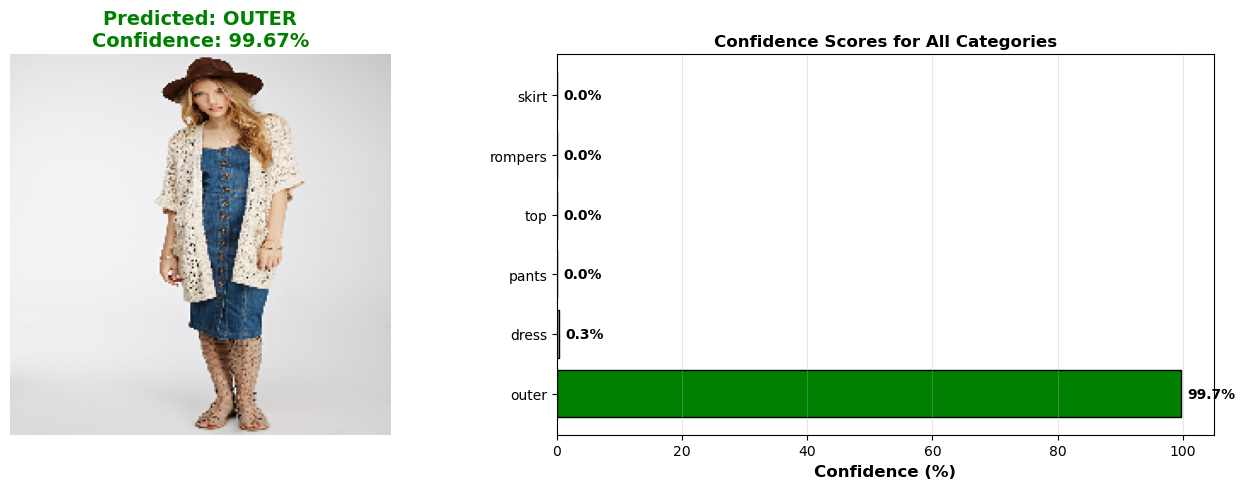


 PREDICTION RESULTS
Image: WOMEN-Cardigans-id_00004818-02_2_side.jpg

 Predicted Category: OUTER
   Confidence: 99.67%

 All Confidence Scores:
   outer     : 99.67% █████████████████████████████████████████████████
   dress     :  0.31% 
   pants     :  0.01% 
   top       :  0.00% 
   rompers   :  0.00% 
   skirt     :  0.00% 

 CORRECT PREDICTION!

Testing: WOMEN-Shorts-id_00004516-03_4_full.jpg
True Label: pants


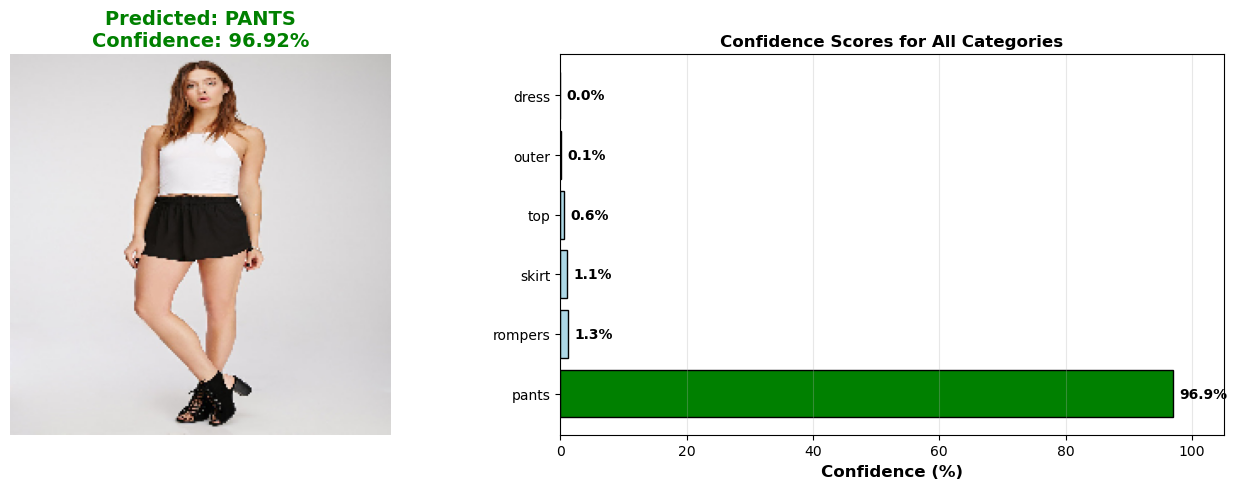


 PREDICTION RESULTS
Image: WOMEN-Shorts-id_00004516-03_4_full.jpg

 Predicted Category: PANTS
   Confidence: 96.92%

 All Confidence Scores:
   pants     : 96.92% ████████████████████████████████████████████████
   rompers   :  1.26% 
   skirt     :  1.14% 
   top       :  0.57% 
   outer     :  0.10% 
   dress     :  0.00% 

 CORRECT PREDICTION!

Testing: WOMEN-Dresses-id_00006274-01_4_full.jpg
True Label: dress


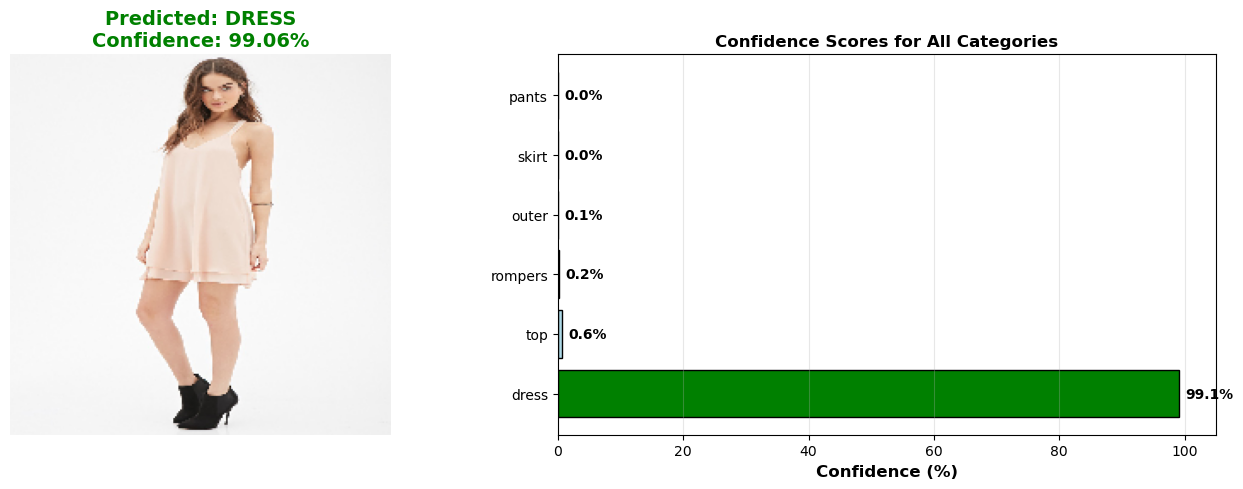


 PREDICTION RESULTS
Image: WOMEN-Dresses-id_00006274-01_4_full.jpg

 Predicted Category: DRESS
   Confidence: 99.06%

 All Confidence Scores:
   dress     : 99.06% █████████████████████████████████████████████████
   top       :  0.64% 
   rompers   :  0.17% 
   outer     :  0.11% 
   skirt     :  0.01% 
   pants     :  0.00% 

 CORRECT PREDICTION!


In [12]:
# Test with a few random images from your dataset
import pandas as pd
import random

# Load test data
PROCESSED_DATA_PATH = os.path.join(PROJECT_ROOT, "data_processed")
IMAGES_PATH = os.path.join(PROJECT_ROOT, "kaggle_images")

test_df = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'test_data.csv'))
test_df = test_df[test_df['category'].isin(CATEGORIES)]

print("🎲 Testing with 3 random images from test set:\n")

# Select 3 random images
sample_images = test_df.sample(3)

for idx, row in sample_images.iterrows():
    img_path = os.path.join(IMAGES_PATH, row['image_name'])
    true_label = row['category']
    
    if os.path.exists(img_path):
        print(f"\n{'='*60}")
        print(f"Testing: {row['image_name']}")
        print(f"True Label: {true_label}")
        print(f"{'='*60}")
        
        # Predict
        predicted_class, confidence, all_probs, original_img = predict_clothing(img_path, model, CATEGORIES)
        
        # Visualize
        visualize_prediction(img_path, predicted_class, confidence, all_probs, original_img)
        
        # Check if correct
        if predicted_class == true_label:
            print("\n CORRECT PREDICTION!")
        else:
            print(f"\n INCORRECT - True label was: {true_label}")
    else:
        print(f" Image not found: {img_path}")

## Step 6: Test with Your Own Image

 Testing your image: test_jacket1.jpg



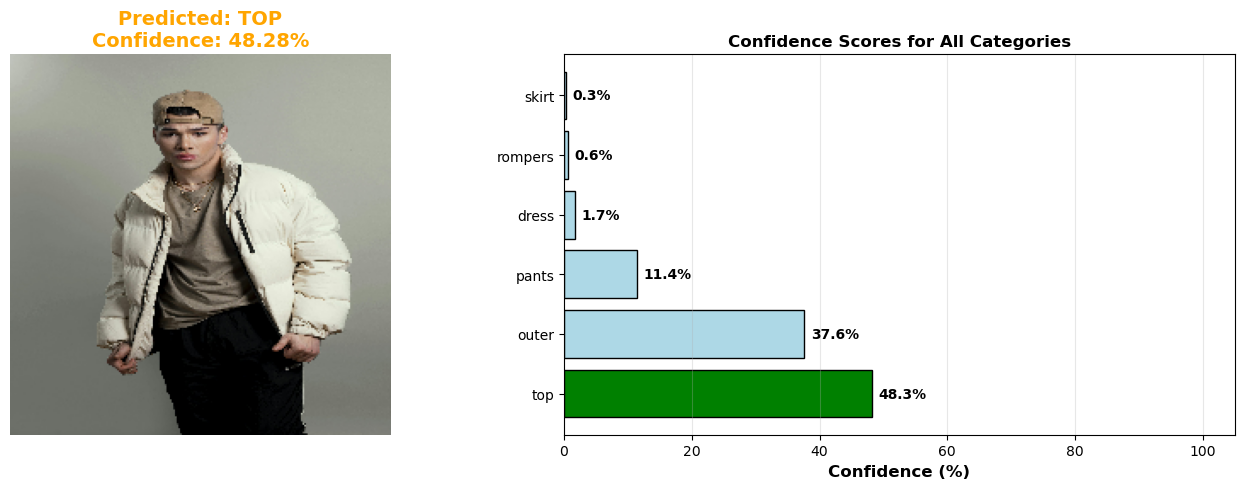


 PREDICTION RESULTS
Image: test_jacket1.jpg

 Predicted Category: TOP
   Confidence: 48.28%

 All Confidence Scores:
   top       : 48.28% ████████████████████████
   outer     : 37.65% ██████████████████
   pants     : 11.41% █████
   dress     :  1.72% 
   rompers   :  0.65% 
   skirt     :  0.29% 


In [28]:
# Test with your own image!
# Instructions:
# 1. Save a clothing image in the 'test_images' folder
# 2. Update the filename below
# 3. Run this cell!

# Example:
your_image_filename = "test_jacket1.jpg"  # <-- Change this to your image filename
your_image_path = os.path.join(TEST_IMAGES_PATH, your_image_filename)

if os.path.exists(your_image_path):
    print(f" Testing your image: {your_image_filename}\n")
    
    # Predict
    predicted_class, confidence, all_probs, original_img = predict_clothing(your_image_path, model, CATEGORIES)
    
    # Visualize
    visualize_prediction(your_image_path, predicted_class, confidence, all_probs, original_img)
else:
    print(f" Image not found: {your_image_path}")
    print(f"\nPlease:")
    print(f"1. Save a clothing image to: {TEST_IMAGES_PATH}")
    print(f"2. Update 'your_image_filename' variable above")
    print(f"3. Run this cell again!")

## Step 7: Interactive Widget (Optional - Requires ipywidgets)

In [ ]:
# Install ipywidgets if needed
# Run this once: !pip install ipywidgets

try:
    from ipywidgets import FileUpload, Button, Output, VBox
    from IPython.display import display, clear_output
    
    # Create upload widget
    upload_widget = FileUpload(
        accept='image/*',
        multiple=False,
        description='Upload Image'
    )
    
    output = Output()
    
    def on_upload_change(change):
        with output:
            clear_output(wait=True)
            
            # Get uploaded file
            uploaded_file = list(upload_widget.value.values())[0]
            
            # Save temporarily
            temp_path = os.path.join(TEST_IMAGES_PATH, 'temp_upload.jpg')
            with open(temp_path, 'wb') as f:
                f.write(uploaded_file['content'])
            
            print("🖼️ Image uploaded! Analyzing...\n")
            
            # Predict
            predicted_class, confidence, all_probs, original_img = predict_clothing(temp_path, model, CATEGORIES)
            
            # Visualize
            visualize_prediction(temp_path, predicted_class, confidence, all_probs, original_img)
    
    upload_widget.observe(on_upload_change, names='value')
    
    print("🎨 Interactive Upload Widget:")
    print("Click 'Upload Image' below and select a clothing image!\n")
    display(VBox([upload_widget, output]))
    
except ImportError:
    print("⚠️ ipywidgets not installed.")
    print("To use interactive upload, run: pip install ipywidgets")
    print("Then restart the kernel and run this cell again.")

## Step 8: Batch Testing (Multiple Images)

In [ ]:
# Test all images in test_images folder
print("📁 Testing all images in test_images folder:\n")

# Get all image files
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
test_images = [f for f in os.listdir(TEST_IMAGES_PATH) 
               if any(f.lower().endswith(ext) for ext in image_extensions)]

if len(test_images) == 0:
    print(f"⚠️ No images found in: {TEST_IMAGES_PATH}")
    print("\nAdd some clothing images to this folder and run again!")
else:
    print(f"Found {len(test_images)} images to test\n")
    
    for img_filename in test_images:
        img_path = os.path.join(TEST_IMAGES_PATH, img_filename)
        
        print(f"\n{'='*60}")
        print(f"Testing: {img_filename}")
        print(f"{'='*60}")
        
        try:
            # Predict
            predicted_class, confidence, all_probs, original_img = predict_clothing(img_path, model, CATEGORIES)
            
            # Visualize
            visualize_prediction(img_path, predicted_class, confidence, all_probs, original_img)
        except Exception as e:
            print(f"❌ Error processing image: {e}")

## 🎉 Testing Complete!

### How to Use This Notebook:

**Method 1: Test with Dataset Images**
- Run Step 5 to test random images from your dataset
- See how the model performs on test data

**Method 2: Test Your Own Images**
- Save clothing images to: `C:\Users\My PC\Documents\clothing_classifier\test_images\`
- Update filename in Step 6
- Run Step 6 to see predictions!

**Method 3: Interactive Upload**
- Install ipywidgets: `pip install ipywidgets`
- Run Step 7
- Click "Upload Image" button
- Get instant predictions!

**Method 4: Batch Testing**
- Add multiple images to test_images folder
- Run Step 8
- Test all at once!

---

### Model Performance:
- **Accuracy:** 83.57%
- **Categories:** dress, outer, pants, rompers, skirt, top
- **Confidence Threshold:** >70% = High confidence

### Next Steps:
1. Test with various images
2. Build Streamlit dashboard (optional)
3. Present to professor!